In [1]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read from csv data source
customer_data = pd.read_csv('customer-data.csv')
customer_data

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


In [9]:
# Previous data preparation

# Input missing values with mean credit score for each income group
def input_creditscore(income_classes):
    for income_class in income_classes:      
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class
        
        # calculate the mean for each income group
        mean = customer_data[customer_data['income'] == income_class]['credit_score'].mean()
        
        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,"credit_score"] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = customer_data['income'].unique()
input_creditscore(income_groups)

# Delete id and postal_code columns
customer_data.drop(["id","postal_code"],axis=1,inplace=True)

In [10]:
# Filling missing data on annual_mileage column

customer_data.groupby(by='driving_experience')['annual_mileage'].mean()
mean_mileage = customer_data['annual_mileage'].mean()
customer_data['annual_mileage']=customer_data['annual_mileage'].fillna(mean_mileage)

In [11]:
customer_data.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [13]:
customer_data['claim_rate'] = np.where(customer_data['outcome']==True,1,0)

# Analisis Credit Score dan Claim Rate

In [14]:
customer_data

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,claim_rate
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.000000,sedan,0,0,0,False,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.000000,sedan,0,0,0,True,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.000000,sedan,0,0,0,False,0
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.000000,sedan,0,0,0,False,0
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.000000,sedan,2,0,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,16000.000000,sedan,0,0,1,False,0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,11697.003207,sedan,1,0,0,False,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,14000.000000,sedan,0,0,0,False,0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,13000.000000,sedan,2,0,1,True,1


##### Analisis hubungan antara credit score dan income group

C:\Users\71477\AppData\Local\Temp\ipykernel_30644\3167409385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_avg, x='income', y='credit_score', palette='viridis')


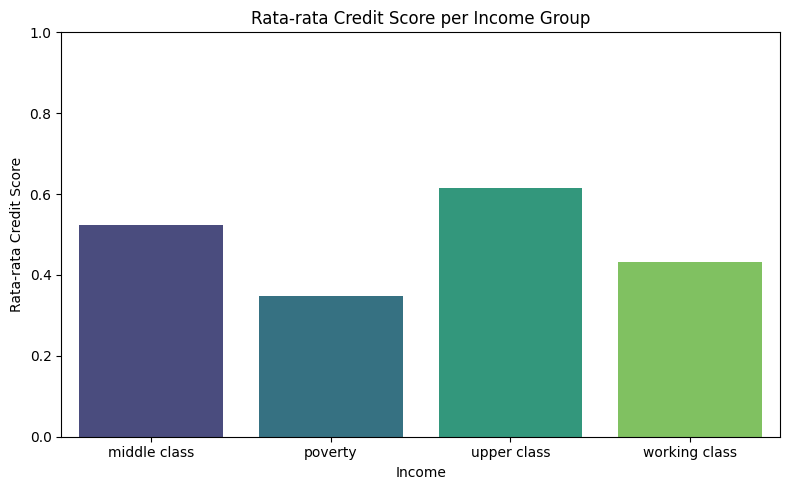

In [69]:
# Hitung rata-rata credit score per income
score_avg = customer_data.groupby('income')['credit_score'].mean().reset_index()

# Visualisasi bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=score_avg, x='income', y='credit_score', palette='viridis')
plt.title('Rata-rata Credit Score per Income Group')
plt.xlabel('Income')
plt.ylabel('Rata-rata Credit Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Group poverty memiliki credit score rendah sehingga memiliki risiko yang tinggi. 

##### Tingkat claim rate berdasarkan income group

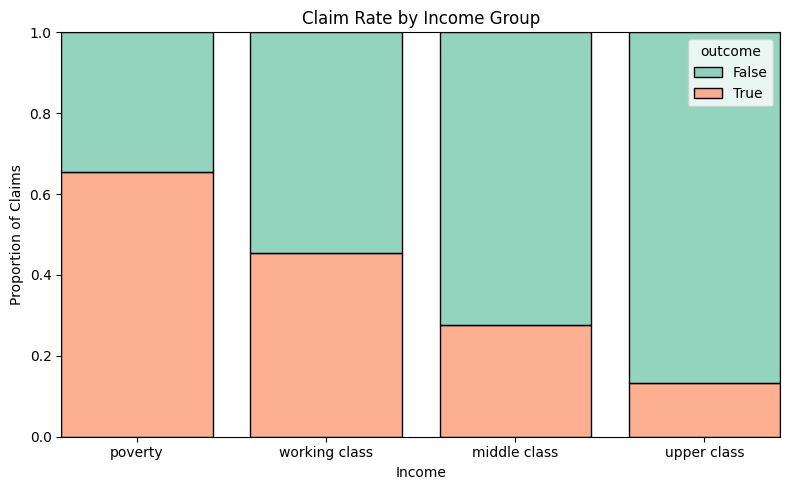

In [16]:
# Atur urutan kategori
income_order = ['poverty', 'working class', 'middle class', 'upper class']
customer_data['income'] = pd.Categorical(customer_data['income'], categories=income_order, ordered=True)

# Buat plot
plt.figure(figsize=(8, 5))
sns.histplot(data=customer_data,
             x='income',
             hue='outcome',
             stat='probability',
             multiple='fill',
             shrink=0.8,
             alpha=0.7,
             palette='Set2')

plt.title('Claim Rate by Income Group')
plt.xlabel('Income')
plt.ylabel('Proportion of Claims')
plt.tight_layout()
plt.show()

Berdasarkan data berikut, claim rate tertinggi ada di kelas income POVERTY

##### Pengelompokkan Credit Score

| Range        | Kategori |
| ------------ | -------- |
| 0.00 – 0.40  | Low      |
| >0.40 – 0.70 | Medium   |
| >0.70 – 1.00 | High     |


In [20]:
bins = [0.0, 0.4, 0.7, 1.0]
labels = ['Low', 'Medium', 'High']
customer_data['credit_score_group'] = pd.cut(customer_data['credit_score'], bins=bins, labels=labels, include_lowest=True)
print(customer_data[['credit_score_group', 'credit_score']].head())

  credit_score_group  credit_score
0             Medium      0.629027
1                Low      0.357757
2             Medium      0.493146
3                Low      0.206013
4                Low      0.388366


##### Tingkat claim rate berdasarkan credit score group

C:\Users\71477\AppData\Local\Temp\ipykernel_27148\465131086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_claim_rate = customer_data.groupby('score_bin')['outcome'].mean().reset_index()
C:\Users\71477\AppData\Local\Temp\ipykernel_27148\465131086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score_bin', y='outcome', data=credit_claim_rate, palette='Blues')


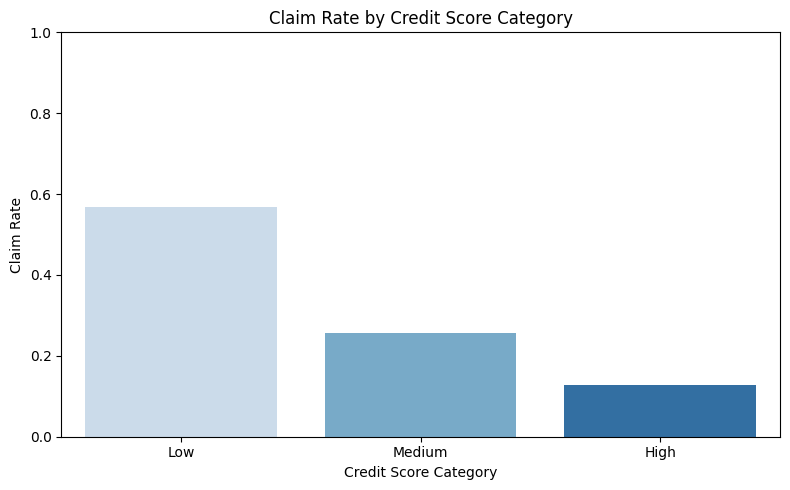

In [24]:
# Hitung claim rate per bin
credit_claim_rate = customer_data.groupby('score_bin')['outcome'].mean().reset_index()

# Visualisasikan
plt.figure(figsize=(8, 5))
sns.barplot(x='score_bin', y='outcome', data=credit_claim_rate, palette='Blues')
plt.title('Claim Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Claim Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

##### Pengelompokkan Claim Rate

In [21]:
claim_rate_by_credit = customer_data.groupby('credit_score_group')['outcome'].mean().reset_index()
claim_rate_by_credit.columns = ['credit_score_group', 'claim_rate']
print(claim_rate_by_credit)

  credit_score_group  claim_rate
0                Low    0.568480
1             Medium    0.255625
2               High    0.129032


C:\Users\71477\AppData\Local\Temp\ipykernel_27148\1759005672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_rate_by_credit = customer_data.groupby('credit_score_group')['outcome'].mean().reset_index()


In [27]:
def categorize_claim_rate(rate):
    if rate >= 0.5:
        return 'High'
    elif rate >= 0.25:
        return 'Medium'
    else:
        return 'Low'

claim_rate_by_credit['claim_rate_group'] = claim_rate_by_credit['claim_rate'].apply(categorize_claim_rate)
print(claim_rate_by_credit[['credit_score_group', 'claim_rate','claim_rate_group']])

  credit_score_group  claim_rate claim_rate_group
0                Low    0.568480             High
1             Medium    0.255625           Medium
2               High    0.129032              Low


In [50]:
customer_data = customer_data.merge(
    claim_rate_by_credit[['credit_score_group', 'claim_rate_group']],
    on='credit_score_group',
    how='left'
)
customer_data

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,...,DUIs,past_accidents,outcome,claim_rate,credit_score_group,score_bin,claim_rate_group_x,total_violation,claim_rate_group_num,claim_rate_group_y
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,...,0,0,True,1,Low,Low,NaN,0,2,High
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,...,0,0,False,0,Low,Low,NaN,0,2,High
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,...,0,1,True,1,Low,Low,NaN,3,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,...,0,1,False,0,Medium,Medium,NaN,1,1,Medium
9996,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,...,0,0,False,0,Medium,Medium,NaN,1,1,Medium
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,...,0,1,True,1,Low,Low,NaN,3,2,High


##### Analisis pengaruh violation terhadap claim rate 

C:\Users\71477\AppData\Local\Temp\ipykernel_27148\1259415047.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_data, x='claim_rate_group_y', y='total_violation', estimator='mean', ci=None, palette='viridis')
C:\Users\71477\AppData\Local\Temp\ipykernel_27148\1259415047.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='claim_rate_group_y', y='total_violation', estimator='mean', ci=None, palette='viridis')


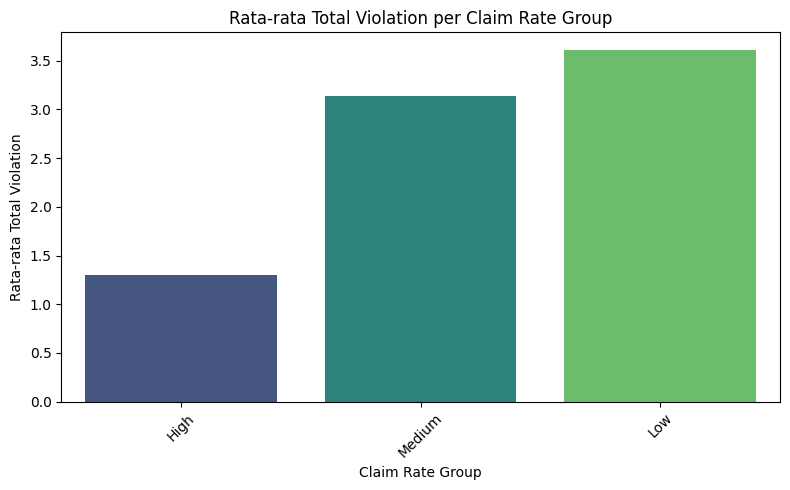

In [53]:
claimrate_order = ['High', 'Medium', 'Low']
customer_data['claim_rate_group_y'] = pd.Categorical(
    customer_data['claim_rate_group_y'],
    categories=claimrate_order,
    ordered=True
)

customer_data['total_violation'] = (
    customer_data['speeding_violations'] +
    customer_data['DUIs'] +
    customer_data['past_accidents']
)


plt.figure(figsize=(8,5))
sns.barplot(data=customer_data, x='claim_rate_group_y', y='total_violation', estimator='mean', ci=None, palette='viridis')
plt.title('Rata-rata Total Violation per Claim Rate Group')
plt.ylabel('Rata-rata Total Violation')
plt.xlabel('Claim Rate Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Terlihat bahwa claim rate tinggi bukan berarti total violationnya banyak

In [ ]:
# Mapping string ke angka
claim_rate_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
customer_data['claim_rate_group_num'] = customer_data['claim_rate_group'].map(claim_rate_mapping)

# Hitung korelasi
correlation = customer_data['claim_rate_group_num'].corr(customer_data['total_violation'])
print(f"Korelasi antara claim rate group dan total violation: {correlation:.2f}")

Korelasi antara claim rate group dan klaim: -0.20


Hubungan antara claim rate group dengan total violation juga terbukti dengan uji korelasi yang dimana hasilnya minus. Hal ini berarti semakin banyak total violation, claim rate semakin rendah

##### Analisis Hubungan Antara Claim Rate High dengan Vehicle Year

In [56]:
customer_data

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,...,DUIs,past_accidents,outcome,claim_rate,credit_score_group,score_bin,claim_rate_group_x,total_violation,claim_rate_group_num,claim_rate_group_y
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,...,0,0,True,1,Low,Low,NaN,0,2,High
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,...,0,0,False,0,Low,Low,NaN,0,2,High
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,...,0,1,True,1,Low,Low,NaN,3,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,...,0,1,False,0,Medium,Medium,NaN,1,1,Medium
9996,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,...,0,0,False,0,Medium,Medium,NaN,1,1,Medium
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,...,0,0,False,0,Medium,Medium,NaN,0,1,Medium
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,...,0,1,True,1,Low,Low,NaN,3,2,High


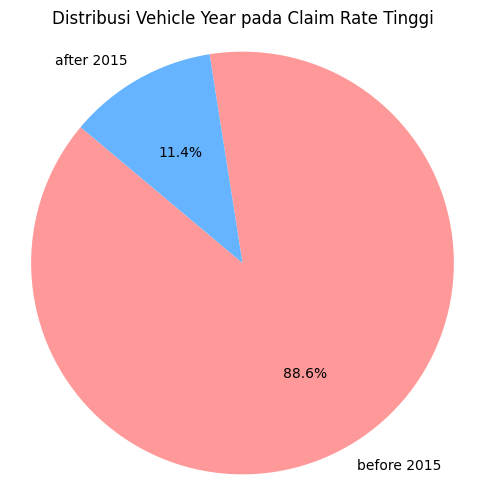

(2132, 24)
vehicle_year
before 2015    1889
after 2015      243
Name: count, dtype: int64


In [59]:
# Filter hanya claim rate high
claim_high = customer_data[customer_data['claim_rate_group_y'] == 'High']

# Hitung jumlah masing-masing vehicle_year dalam kelompok ini
vehicle_year_counts = claim_high['vehicle_year'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(vehicle_year_counts, labels=vehicle_year_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Vehicle Year pada Claim Rate Tinggi')
plt.axis('equal')  # Supaya bentuknya lingkaran sempurna
plt.show()
print(claim_high.shape)
print(claim_high['vehicle_year'].value_counts())

88,6% Customer dengan claim rate tinggi memiliki kendaraan dengan vehicle year before 2015

##### Analisis Claim Rate High dengan Driving Experience Customer

In [60]:
ct = pd.crosstab(index=claim_high['driving_experience'], columns='count')
print(ct)

col_0               count
driving_experience       
0-9y                 1261
10-19y                675
20-29y                166
30y+                   30


C:\Users\71477\AppData\Local\Temp\ipykernel_27148\3842138802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driving_exp_counts.index, y=driving_exp_counts.values, palette='Set2')


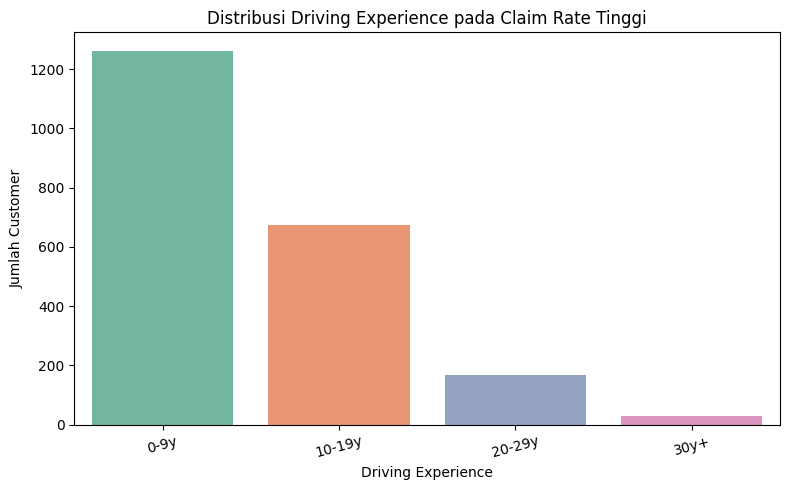

In [62]:
# Hitung jumlah driving_experience dalam low score group
driving_exp_counts = claim_high['driving_experience'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=driving_exp_counts.index, y=driving_exp_counts.values, palette='Set2')
plt.title('Distribusi Driving Experience pada Claim Rate Tinggi')
plt.xlabel('Driving Experience')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Customer dengan credit low rendah dan claim rate tinggi didominasi dengan driving experience dari group yang paling rendah

##### Hubungan antara driving experience dengan vehicle year before 2015 pada customer dengan claim rate tinggi 

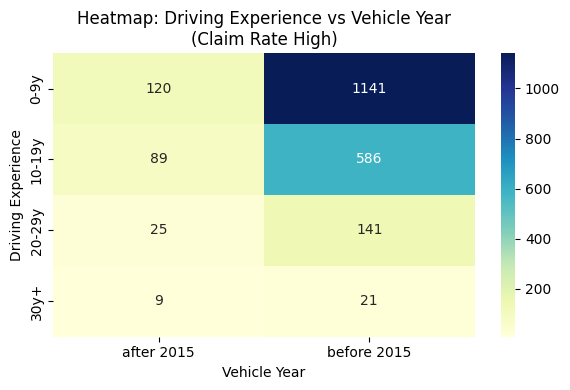

In [63]:
# Crosstab antara driving_experience dan vehicle_year
heatmap_data = pd.crosstab(
    index=claim_high['driving_experience'],
    columns=claim_high['vehicle_year']
)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Driving Experience vs Vehicle Year\n(Claim Rate High)')
plt.xlabel('Vehicle Year')
plt.ylabel('Driving Experience')
plt.tight_layout()
plt.show()


Proporsi terbanyak customer dengan credit low rendah dan claim rate tinggi adalah customer dengan driving experience 0-9y DAN vehicle year before 2015

C:\Users\71477\AppData\Local\Temp\ipykernel_27148\3416343291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driving_exp_counts.index, y=driving_exp_counts.values, palette='Set3')


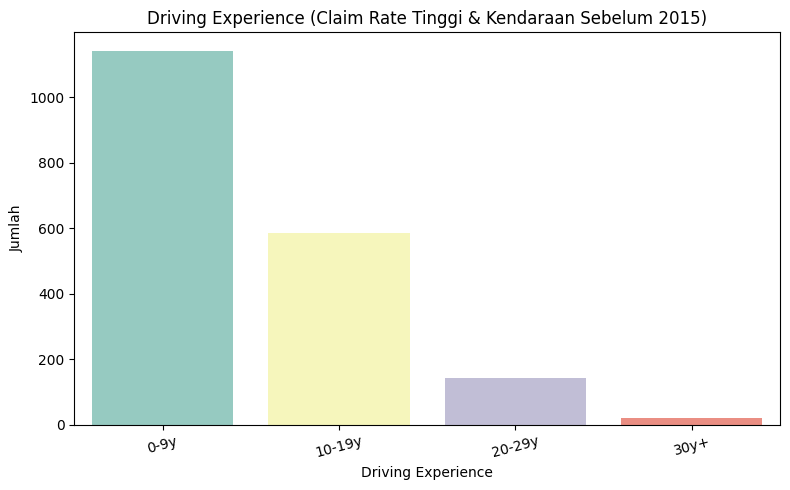

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk group dengan score rendah dan vehicle sebelum 2015
filtered_data = customer_data[
    (customer_data['claim_rate_group_y'] == 'High') &
    (customer_data['vehicle_year'] == 'before 2015')
]

# Hitung frekuensi driving experience
driving_exp_counts = filtered_data['driving_experience'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=driving_exp_counts.index, y=driving_exp_counts.values, palette='Set3')
plt.title('Driving Experience (Claim Rate Tinggi & Kendaraan Sebelum 2015)')
plt.xlabel('Driving Experience')
plt.ylabel('Jumlah')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


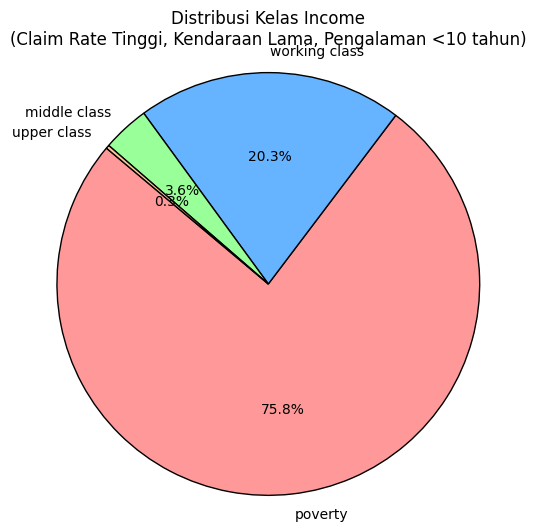

In [65]:
import matplotlib.pyplot as plt

# Filter data sesuai kondisi
filtered = customer_data[
    (customer_data['claim_rate_group_y'] == 'High') &
    (customer_data['vehicle_year'] == 'before 2015') &
    (customer_data['driving_experience'] == '0-9y')
]

# Hitung distribusi income
income_counts = filtered['income'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Kelas Income\n(Claim Rate Tinggi, Kendaraan Lama, Pengalaman <10 tahun)')
plt.axis('equal')  # Lingkaran sempurna
plt.show()


In [90]:
# Hitung proporsi age
age_proportion = customer_data['age'].value_counts().sort_index()

# Tampilkan dalam persen
print((age_proportion))


age
16-25    2016
26-39    3063
40-64    2931
65+      1990
Name: count, dtype: int64


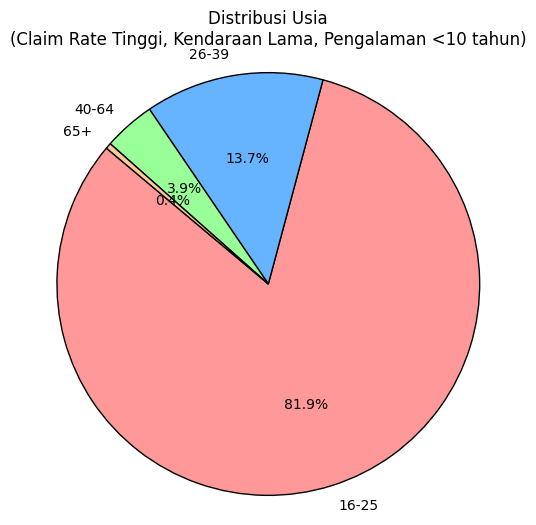

In [66]:
import matplotlib.pyplot as plt

# Filter data sesuai kondisi
filtered = customer_data[
    (customer_data['claim_rate_group_y'] == 'High') &
    (customer_data['vehicle_year'] == 'before 2015') &
    (customer_data['driving_experience'] == '0-9y')
]

# Hitung distribusi age
age_counts = filtered['age'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Usia\n(Claim Rate Tinggi, Kendaraan Lama, Pengalaman <10 tahun)')
plt.axis('equal')  # Lingkaran sempurna
plt.show()



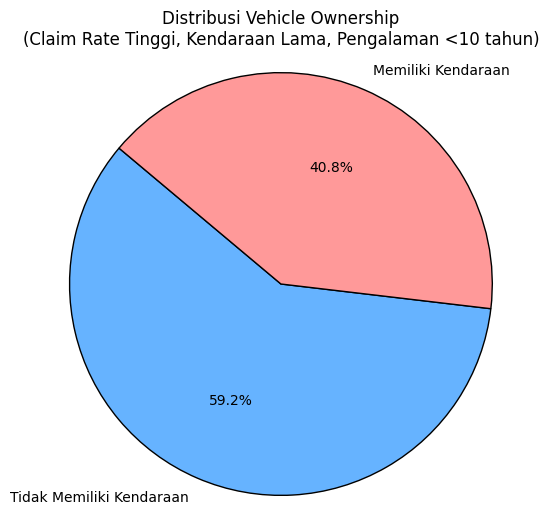

In [67]:
# Hitung distribusi vehicle ownership
ownership_counts = filtered['vehicle_ownership'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
labels = ['Memiliki Kendaraan' if x else 'Tidak Memiliki Kendaraan' for x in ownership_counts.index]
colors = ['#66b3ff', '#ff9999']
plt.pie(ownership_counts, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Vehicle Ownership\n(Claim Rate Tinggi, Kendaraan Lama, Pengalaman <10 tahun)')
plt.axis('equal')  # Lingkaran sempurna
plt.show()

##### Dapat disimpulkan bahwa faktor utama yang mempengaruhi claim rate tinggi adalah umur kendaraan dan driving experience

##### Selain itu, umur juga mempengaruhi yang dimana dalam kasus ini proporsi umur 16-25 proporsinya mencapai 80%

Hal ini dapat menjadi pertimbangan untuk penentuan risiko dan premi dari asuransi, khususnya bagi customer dengan credit score rendah (berdasarkan data, credit score rendah memiliki claim rate tinggi)